# 📊 **Employee Attrition Analysis**

**Analytics Portfolio - Project 1**

**Author: Nadia Rozman**

## **Project Objective**

To analyze employee demographic and compensation data in order to:
- Understand key workforce characteristics
- Examine the relationship between tenure, income, and job level
- Identify patterns that may indicate employee attrition risk
- Provide data-driven insights to support retention and workforce planning strategies

### **Library Imports & Environment Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew

In [ ]:
# Visualization configuration
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Create directory for outputs
os.makedirs("images", exist_ok=True)

### **Data Loading & Initial Exploration**

In [ ]:
# Load dataset
df = pd.read_csv("employee_data.csv")

# Preview dataset
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,JobRole,MaritalStatus,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,1,...,Sales Executive,Single,3,0,0,1,6,0,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,1,...,Research Scientist,Married,4,1,3,3,10,1,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,1,...,Laboratory Technician,Single,3,0,3,3,0,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,1,...,Research Scientist,Married,3,0,3,3,8,3,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,...,Laboratory Technician,Married,3,1,3,3,2,2,No,No


In [ ]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   MonthlyIncome            1470 non-null   int64 
 3   JobSatisfaction          1470 non-null   int64 
 4   Bonus                    1470 non-null   int64 
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   Education                1470 non-null   int64 
 8   EducationField           1470 non-null   object
 9   EmployeeCount            1470 non-null   int64 
 10  EmployeeNumber           1470 non-null   int64 
 11  EnvironmentSatisfaction  1470 non-null   int64 
 12  Gender                   1470 non-null   object
 13  JobLevel                 1470 non-null   int64 
 14  JobRole                  1470 non-null  

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Age,0
BusinessTravel,0
MonthlyIncome,0
JobSatisfaction,0
Bonus,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### **Dataset Dimensions & Descriptive Statistics**

In [ ]:
# Get number of rows and columns
print(f"Dataset contains {rows} rows and {cols} variables.")

Dataset contains 1470 rows and 24 variables.


In [ ]:
# Calculate key statistics
avg_age = round(df["Age"].mean(), 2)
avg_income = round(df["MonthlyIncome"].mean(), 2)
avg_tenure = round(df["YearsAtCompany"].mean(), 2)

print("Key Workforce Metrics")
print(f"Average Age: {avg_age}")
print(f"Average Monthly Income: ${avg_income:,.2f}")
print(f"Average Tenure: {avg_tenure} years")

Key Workforce Metrics
Average Age: 36.92
Average Monthly Income: $6,502.93
Average Tenure: 7.01 years


In [ ]:
# Minimum and maximum Monthly Income
min_income = df["MonthlyIncome"].min()
max_income = df["MonthlyIncome"].max()

print(f"Minimum Income: ${min_income:,}")
print(f"Maximum Income: ${max_income:,}")
print(f"Income Range: ${max_income - min_income:,}")

Minimum Income: $1,009
Maximum Income: $19,999
Income Range: $18,990


### **Income Analysis**

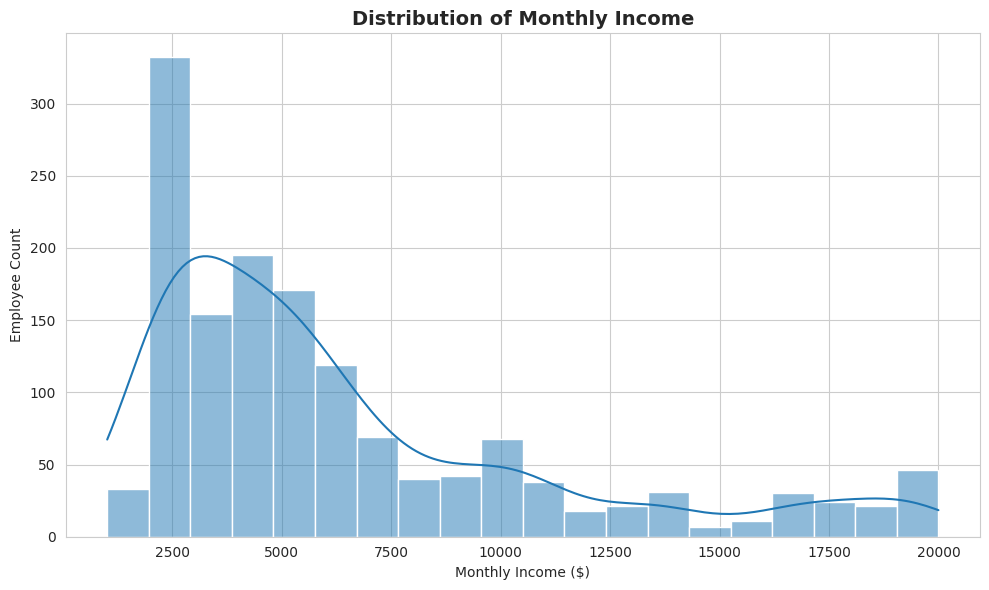

In [ ]:
# Histogram with KDE of Monthly Income
plt.figure(figsize=(10,6))
sns.histplot(df["MonthlyIncome"], bins=20, kde=True)
plt.title("Distribution of Monthly Income", fontsize=14, fontweight="bold")
plt.xlabel("Monthly Income ($)")
plt.ylabel("Employee Count")
plt.tight_layout()
plt.savefig("images/1_income_distribution.png", dpi=300)
plt.show()

In [ ]:
# Calculate skewness
income_skewness = skew(df["MonthlyIncome"])
print(f"Income Skewness: {income_skewness:.2f}")
print("Note: Positive skewness indicates right-skewed distribution")

Income Skewness: 1.37
Note: Positive skewness indicates right-skewed distribution


### **Tenure vs Income Relationship**

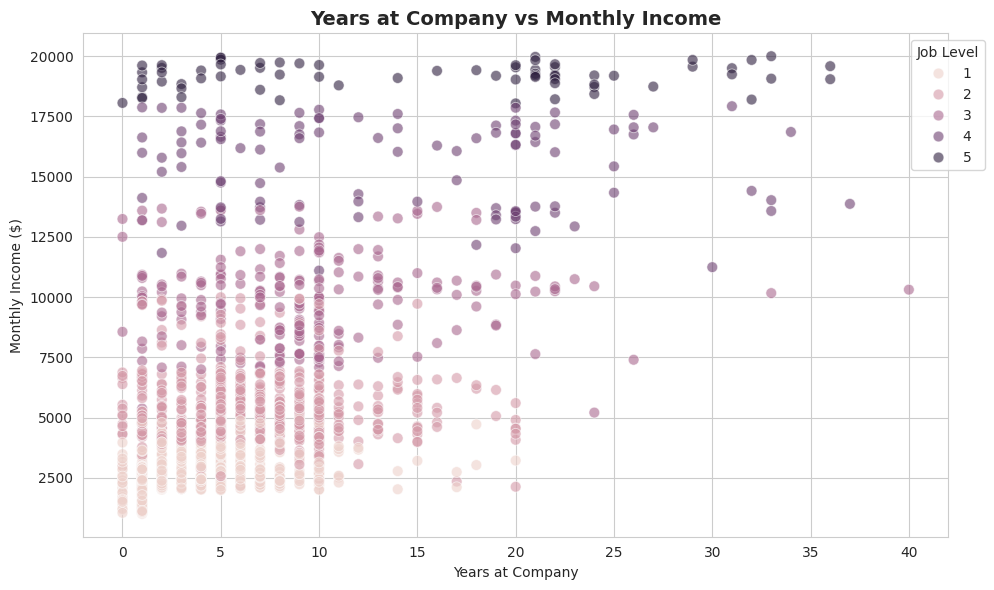

In [ ]:
# Scatter plot: YearsAtCompany vs MonthlyIncome
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="YearsAtCompany",
    y="MonthlyIncome",
    hue="JobLevel",
    alpha=0.6,
    s=60
)
plt.title("Years at Company vs Monthly Income", fontsize=14, fontweight="bold")
plt.xlabel("Years at Company")
plt.ylabel("Monthly Income ($)")
plt.legend(title="Job Level", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("images/2_tenure_income_relationship.png", dpi=300)
plt.show()

### **Correlation Analysis**

In [ ]:
# Correlation between YearsAtCompany and MonthlyIncome
correlation = df["YearsAtCompany"].corr(df["MonthlyIncome"])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: 0.51


In [ ]:
# Interpretation
if correlation > 0.5:
    interpretation = "moderate to strong positive relationship"
elif correlation > 0.3:
    interpretation = "moderate positive relationship"
else:
    interpretation = "weak positive relationship"

print(f"Interpretation: {interpretation}")

Interpretation: moderate to strong positive relationship
